In [14]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Linear Regression

### 1. What problem is linear regression used to solve?
Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to predict the value of the dependent variable based on the values of the independent variables. Linear regression is commonly used for regression problems, where the task is to predict a continuous outcome, such as house prices, temperature, or stock prices.

### 2. What assumption does the model make?
Linear regression makes several key assumptions about the data:
   - **Linearity**: There is a linear relationship between the dependent and independent variables.
   - **Independence**: The residuals (errors) are independent of each other.
   - **Homoscedasticity**: The residuals have constant variance.
   - **Normality**: The residuals are normally distributed.
   - **No multicollinearity**: In multiple linear regression, the independent variables are not highly correlated with each other.

If these assumptions are not met, the model may not perform well or may produce biased estimates.

### 3. What is the model?
The linear regression model represents the relationship between the dependent variable $y$ and the independent variables $x_1, x_2, \ldots, x_n$ as a linear equation:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon
$$

where:
   - $y$ is the dependent variable.
   - $\beta_0$ is the intercept term.
   - $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients (slopes) that represent the change in $y$ for a one-unit change in each $x_i$.
   - $\epsilon$ is the error term or residual, capturing the deviation of the actual values from the predicted values.

In the simplest case of a single feature $x$, the model simplifies to:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

### 4. How is the model trained?
The model is trained by estimating the coefficients $\beta_0, \beta_1, \ldots, \beta_n$ to minimize the error between the predicted values $\hat{y}$ and the actual values $y$. The most common method for finding these coefficients is **Ordinary Least Squares (OLS)**, which minimizes the **sum of squared errors (SSE)**:

$$
\text{SSE} = \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

where $m$ is the number of data points. The solution can be computed using the closed-form equation:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

where:
   - $X$ is the matrix of feature values.
   - $y$ is the vector of observed values.
   - $\hat{\beta}$ is the vector of estimated coefficients.

Alternatively, **gradient descent** can be used to iteratively minimize the error, which is useful for large datasets or when a closed-form solution is computationally expensive.

### 5. How is the model evaluated?
The performance of a linear regression model is typically evaluated using metrics that measure the difference between predicted values $\hat{y}$ and actual values $y$. Common evaluation metrics include:

   - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
     $$
     \text{MAE} = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|
     $$

   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     $$
     \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
     $$

   - **R-squared ($R^2$)**: Represents the proportion of variance in the dependent variable that can be explained by the independent variables. It is given by:
     $$
     R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
     $$
     where $\text{SS}_{\text{res}}$ is the sum of squared residuals and $\text{SS}_{\text{tot}}$ is the total sum of squares.

These metrics help determine how well the model fits the data and its predictive power.

In [23]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Evaluate the fitness of the model
r_squared = model.score(X, y)
print(f"R^2: {r_squared}")

R^2: 0.5177484222203498


# Ridge Regression

### 1. What problem is ridge regression used to solve?
Ridge regression is used to address multicollinearity in linear regression and to prevent overfitting by introducing regularization. It is particularly useful when the dataset has many features that may be highly correlated or when there is more noise than signal in the data. Ridge regression is a form of **L2 regularization** that adds a penalty to the size of the coefficients, shrinking them towards zero but not exactly zero. This allows for better generalization on unseen data.

### 2. What assumption does the model make?
Ridge regression makes similar assumptions to linear regression:
   - **Linearity**: Assumes a linear relationship between the dependent and independent variables.
   - **Independence**: Residuals are assumed to be independent of each other.
   - **Homoscedasticity**: Residuals have constant variance.
   - **Normality**: Residuals are normally distributed.
   
Additionally, ridge regression assumes that all predictors are relevant but may have high correlation. The added regularization term helps to mitigate issues arising from multicollinearity.

### 3. What is the model?
The ridge regression model modifies the linear regression equation by adding a regularization term to penalize large coefficients. This changes the cost function from minimizing the **sum of squared errors (SSE)** to minimizing **SSE** plus a penalty term proportional to the square of the magnitude of the coefficients:

$$
\text{Cost Function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^n \beta_j^2
$$

where:
   - $y_i$ are the actual target values.
   - $\hat{y}_i$ are the predicted values.
   - $\beta_j$ represents each coefficient.
   - $\lambda$ is the regularization parameter, which controls the strength of the penalty. A larger $\lambda$ shrinks the coefficients more, while $\lambda = 0$ results in ordinary linear regression.

This regularization term $\lambda \sum_{j=1}^n \beta_j^2$ helps to prevent large values for $\beta_j$, which reduces variance and improves the stability of the model.

### 4. How is the model trained?
To train the model, ridge regression estimates the coefficients $\beta$ by minimizing the modified cost function that includes the regularization term. The closed-form solution for the ridge regression coefficients is given by:

$$
\hat{\beta} = (X^T X + \lambda I)^{-1} X^T y
$$

where:
   - $X$ is the matrix of feature values.
   - $y$ is the vector of observed values.
   - $I$ is the identity matrix.
   - $\lambda$ is the regularization parameter.

The regularization term $\lambda I$ makes the matrix $X^T X + \lambda I$ invertible, even when $X^T X$ is singular, helping to address multicollinearity. The optimal $\lambda$ is often selected through **cross-validation**, where multiple values are tested, and the one yielding the best performance on validation data is chosen.

### 5. How is the model evaluated?
Ridge regression is evaluated using the same metrics as linear regression, with a focus on finding a balance between bias and variance. Common evaluation metrics include:

   - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
     $$
     \text{MAE} = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|
     $$

   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     $$
     \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
     $$

   - **R-squared ($R^2$)**: Represents the proportion of variance in the dependent variable explained by the independent variables, helping assess model fit.
     $$
     R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
     $$

An additional step in ridge regression is to evaluate performance across different values of $\lambda$ to find the best trade-off between minimizing error and preventing overfitting. Cross-validation is often used to identify the best $\lambda$ value, aiming to maximize model performance on unseen data.

In [24]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge()

# Fit the model to the data
ridge_model.fit(X, y)

# Evaluate the fitness of the model
ridge_r_squared = ridge_model.score(X, y)
print(f"Ridge R^2: {ridge_r_squared}")

Ridge R^2: 0.45123062774361744


# Lasso Regression

### 1. What problem is lasso regression used to solve?
Lasso regression, or **Least Absolute Shrinkage and Selection Operator (LASSO)**, is used to address problems of overfitting and feature selection in regression models. By adding an L1 regularization term, lasso regression encourages sparsity in the model coefficients, effectively setting some coefficients to zero. This makes it particularly useful when we suspect that only a subset of features are relevant, as lasso regression can both reduce model complexity and enhance interpretability by automatically performing feature selection.

### 2. What assumption does the model make?
Lasso regression makes similar assumptions to linear regression:
   - **Linearity**: Assumes a linear relationship between the dependent and independent variables.
   - **Independence**: Assumes residuals are independent of each other.
   - **Homoscedasticity**: Residuals have constant variance.
   - **Normality**: Residuals are normally distributed.

Additionally, lasso assumes that some features may be irrelevant or redundant. By using L1 regularization, lasso is particularly effective when there is a high-dimensional dataset with many irrelevant features, as it tends to reduce irrelevant coefficients to zero.

### 3. What is the model?
The lasso regression model modifies the linear regression cost function by adding an L1 regularization term to penalize large coefficients. This changes the objective from minimizing the **sum of squared errors (SSE)** to minimizing **SSE** plus a penalty term proportional to the absolute values of the coefficients:

$$
\text{Cost Function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^n |\beta_j|
$$

where:
   - $y_i$ are the actual target values.
   - $\hat{y}_i$ are the predicted values.
   - $\beta_j$ represents each coefficient.
   - $\lambda$ is the regularization parameter, controlling the strength of the penalty. A larger $\lambda$ results in more coefficients being driven to zero, while $\lambda = 0$ yields ordinary linear regression.

This regularization term $\lambda \sum_{j=1}^n |\beta_j|$ encourages sparsity in the model, as it penalizes the absolute size of the coefficients rather than their squared values. Consequently, lasso regression can effectively remove some features by setting their coefficients exactly to zero.

### 4. How is the model trained?
The model is trained by finding the coefficients $\beta$ that minimize the modified cost function, which includes the L1 penalty. Unlike ridge regression, there is no closed-form solution for lasso regression due to the absolute value in the penalty term. Instead, **optimization algorithms** like coordinate descent or the **LARS (Least Angle Regression)** algorithm are used to find the coefficients.

The regularization parameter $\lambda$ is typically selected through **cross-validation**. Different values of $\lambda$ are tested, and the one yielding the best performance on the validation set is chosen. A higher $\lambda$ will result in more coefficients being set to zero, while a lower $\lambda$ will retain more features.

### 5. How is the model evaluated?
Lasso regression is evaluated using the same metrics as linear regression and ridge regression, with an additional focus on interpretability and feature selection. Common evaluation metrics include:

   - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
     $$
     \text{MAE} = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|
     $$

   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     $$
     \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
     $$

   - **R-squared ($R^2$)**: Represents the proportion of variance in the dependent variable explained by the independent variables, helping assess model fit.
     $$
     R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
     $$

Additionally, lasso regression is evaluated based on the number of features selected by the model, as lasso naturally performs feature selection by setting some coefficients to zero. Cross-validation is often used to find the optimal $\lambda$ that balances error minimization with sparsity, improving generalization and interpretability.

In [25]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
lasso_model = Lasso()

# Fit the model to the data
lasso_model.fit(X, y)

# Evaluate the fitness of the model
lasso_r_squared = lasso_model.score(X, y)
print(f"Lasso R^2: {lasso_r_squared}")

Lasso R^2: 0.357378738231628


# Elastic Net

### 1. What problem is elastic net used to solve?
Elastic Net is a regression technique designed to solve issues of multicollinearity, overfitting, and feature selection, especially when dealing with high-dimensional datasets with highly correlated or redundant features. Elastic Net combines **L1** (lasso) and **L2** (ridge) regularization, capturing the benefits of both methods. It is particularly useful when there are multiple correlated features, as lasso may arbitrarily select one feature among a group of correlated features and discard the others, whereas Elastic Net tends to include groups of correlated features together.

### 2. What assumption does the model make?
Elastic Net makes similar assumptions to linear regression:
   - **Linearity**: Assumes a linear relationship between the dependent and independent variables.
   - **Independence**: Assumes residuals are independent of each other.
   - **Homoscedasticity**: Assumes residuals have constant variance.
   - **Normality**: Assumes residuals are normally distributed.

Additionally, Elastic Net assumes that the dataset may contain redundant or correlated features. By combining L1 and L2 regularization, it is better equipped to handle these situations, with the L1 penalty encouraging sparsity (feature selection) and the L2 penalty stabilizing the model when features are correlated.

### 3. What is the model?
The Elastic Net model is a linear regression model with a combined L1 and L2 regularization term in its cost function. This cost function minimizes the **sum of squared errors (SSE)** with both **L1** and **L2** penalties:

$$
\text{Cost Function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^n |\beta_j| + \lambda_2 \sum_{j=1}^n \beta_j^2
$$

where:
   - $y_i$ are the actual target values.
   - $\hat{y}_i$ are the predicted values.
   - $\beta_j$ represents each coefficient.
   - $\lambda_1$ controls the strength of the L1 penalty (lasso).
   - $\lambda_2$ controls the strength of the L2 penalty (ridge).

This cost function can also be reformulated with a single parameter $\alpha$ that mixes the L1 and L2 penalties:

$$
\text{Cost Function} = \sum_{i=1}^m (y_i - \hat{y}_i)^2 + \lambda \left( \alpha \sum_{j=1}^n |\beta_j| + (1 - \alpha) \sum_{j=1}^n \beta_j^2 \right)
$$

where:
   - $\lambda$ is the overall regularization strength.
   - $\alpha$ determines the balance between L1 and L2 penalties (0 ≤ $\alpha$ ≤ 1). When $\alpha = 1$, Elastic Net behaves like lasso; when $\alpha = 0$, it behaves like ridge regression.

### 4. How is the model trained?
To train the Elastic Net model, the coefficients $\beta$ are estimated by minimizing the cost function with the combined regularization terms. Since there is no closed-form solution due to the L1 penalty, **optimization algorithms** like coordinate descent are used to find the coefficients.

The parameters $\lambda$ (regularization strength) and $\alpha$ (balance between L1 and L2) are typically selected through **cross-validation**. By testing different values of $\lambda$ and $\alpha$, the combination yielding the best performance on validation data is chosen. The L1 component tends to drive some coefficients to zero, performing feature selection, while the L2 component helps maintain model stability with correlated features.

### 5. How is the model evaluated?
Elastic Net is evaluated using the same metrics as linear regression, ridge regression, and lasso regression, with a focus on both predictive accuracy and the interpretability achieved through feature selection. Common evaluation metrics include:

   - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values.
     $$
     \text{MAE} = \frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|
     $$

   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     $$
     \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
     $$

   - **R-squared ($R^2$)**: Represents the proportion of variance in the dependent variable explained by the independent variables, helping assess model fit.
     $$
     R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
     $$

Elastic Net performance is evaluated across different values of $\lambda$ and $\alpha$ to find the best combination that balances error minimization, generalization, and sparsity. Cross-validation is commonly used to identify these optimal parameter values, with the goal of achieving a model that generalizes well to unseen data while selecting the most relevant features.

In [26]:
from sklearn.linear_model import ElasticNet

# Create an Elastic Net regression model
elastic_net_model = ElasticNet()

# Fit the model to the data
elastic_net_model.fit(X, y)

# Evaluate the fitness of the model
elastic_net_r_squared = elastic_net_model.score(X, y)
print(f"Elastic Net R^2: {elastic_net_r_squared}")

Elastic Net R^2: 0.008834748998299613


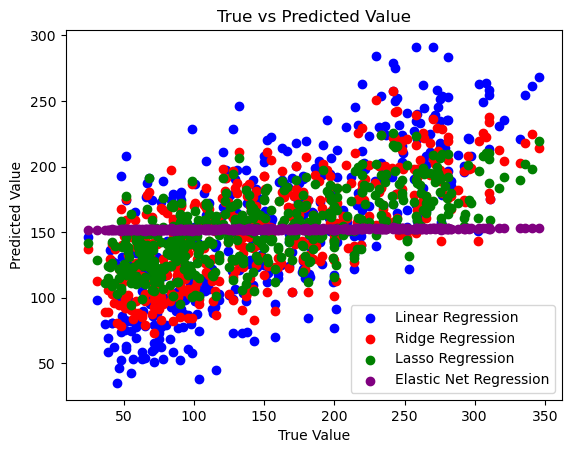

In [27]:
# Put all plots together, colored by model
y_pred = model.predict(X)
ridge_y_pred = ridge_model.predict(X)
lasso_y_pred = lasso_model.predict(X)
elastic_net_y_pred = elastic_net_model.predict(X)

plt.scatter(y, y_pred, color='blue', label='Linear Regression')
plt.scatter(y, ridge_y_pred, color='red', label='Ridge Regression')
plt.scatter(y, lasso_y_pred, color='green', label='Lasso Regression')
plt.scatter(y, elastic_net_y_pred, color='purple', label='Elastic Net Regression')

plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Value')
plt.legend()
plt.show()